**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 2

**Datos de la entrega:** Lunes 23 de Octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Daniel Araya Sambucci.
- Esteban Leiva Montenegro.




___

# Parte 1  -  Regresión (50 puntos)
___

# Introducción

Considere:
- Se le proporciona un conjunto de datos (diamonds), si desea conocer un poco de los atributos puede consultar en: https://www.kaggle.com/datasets/shivam2503/diamonds
- Note que en la página proporcionada se mencionan más atributos de los que contiene el archivo facilitado.  
- El objetivo de esta parte es ver como el estudiante se enfrenta al proceso de pre-procesamiento, selección de atributos, predicción y evaluación.  Por eso es muy importante que documente en este cuaderno sus decisiones, eso se tomará muy en cuenta en la evaluación de su respuesta.
- El atributo a predecir en regresión se denomina: price.
- Debe comentar ampliamente su código


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


### 1 (5 puntos)
- Cargue el archivo.
- Utilice las herramientas (gráficos, funciones que describen contenido o características de las variables, etc) que considere necesarias para analizar los atributos que tiene el dataset y ver si tiene valores faltantes, valores atípicos, etc.
- Comente sus conclusiones sobre los atritubos.


In [2]:
dataFrame = pd.read_csv('diamonds.csv', header =0, delimiter = ',')
dataFrame.head() #Show first 5 rows


,carat,depth,table,price,x,y,z,cut
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1


1.2 Getting more information about the attributes to know them

In [3]:
dataFrame.describe() #Show a summary of the attributes

,carat,depth,table,price,x,y,z,cut
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,2.904097
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,1.116600
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3.000000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,4.000000


#### 1.3.1
Plotting the dataFrame 
    
We decided to create a chart for some attributes in the dataset to understand them better. While it's challenging to draw final conclusions, we can highlight a few interesting observations:

Carat:
Initially, we analyzed the carat attribute versus price to compare price values based on weight. We observed that weight alone doesn't define the price, but there is a clear relationship, as heavier diamonds tend to be more expensive. Interestingly, some diamonds with the same weight are affected differently by price, indicating that price depends on other factors as well.

Depth:
When looking at the diamond's depth, we noticed that most diamonds have a depth of 60. However, a higher depth doesn't necessarily lead to a higher price, as even the diamond with the greatest depth is among the lower-priced ones.

Table:
The majority of diamonds have a table measurement between 60 and 70.

X, Y, Z:
These attributes are intriguing because they each have some outlier values. Notably, the length of the diamond is one of the attributes that show the most significant price variations. And we have some outliers so we need to take care of them.

Regarding cross-correlation, we find that the price will always be positively affected by each attribute, meaning that a higher value influences the price. Additionally, we observe a bidirectional relationship, where the attribute and the price strongly influence each other.




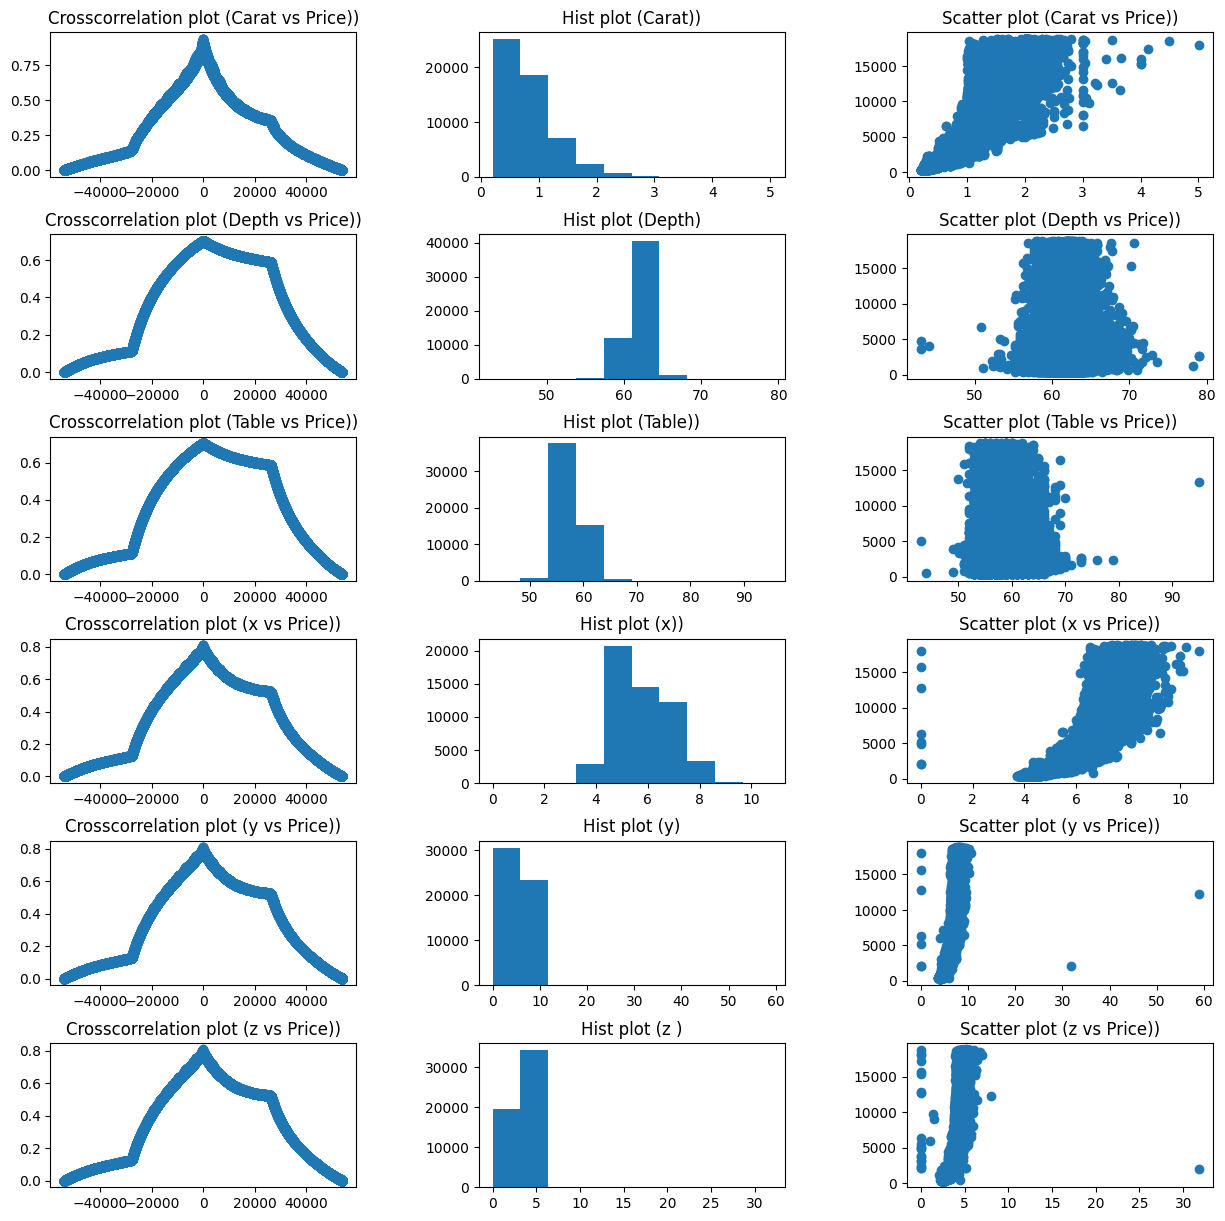

In [4]:
fig, axs  = plt.subplots(6,3, figsize=(15, 15))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
#Carat vs price
axs[0][0].set_title('Crosscorrelation plot (Carat vs Price))')
axs[0][0].xcorr(dataFrame['carat'],dataFrame['price'], maxlags=len(dataFrame['carat']) - 1, usevlines=False,normed=True, lw=2)
axs[0][1].set_title('Hist plot (Carat))')
axs[0][1].hist(dataFrame['carat'])
axs[0][2].set_title('Scatter plot (Carat vs Price))')
axs[0][2].scatter(dataFrame['carat'], dataFrame['price'])
#depth vs price
axs[1][0].set_title('Crosscorrelation plot (Depth vs Price))')
axs[1][0].xcorr(dataFrame['depth'],dataFrame['price'], maxlags=len(dataFrame['depth']) - 1, usevlines=False,normed=True, lw=2)
axs[1][1].set_title('Hist plot (Depth)')
axs[1][1].hist(dataFrame['depth'])
axs[1][2].set_title('Scatter plot (Depth vs Price))')
axs[1][2].scatter(dataFrame['depth'], dataFrame['price'])
#table vs price
axs[2][0].set_title('Crosscorrelation plot (Table vs Price))')
axs[2][0].xcorr(dataFrame['table'],dataFrame['price'], maxlags=len(dataFrame['table']) - 1, usevlines=False,normed=True, lw=2)
axs[2][1].set_title('Hist plot (Table))')
axs[2][1].hist(dataFrame['table'])
axs[2][2].set_title('Scatter plot (Table vs Price))')
axs[2][2].scatter(dataFrame['table'], dataFrame['price'])
axs[3][0].set_title('Crosscorrelation plot (x vs Price))')
axs[3][0].xcorr(dataFrame['x'],dataFrame['price'], maxlags=len(dataFrame['x']) - 1, usevlines=False,normed=True, lw=2)
axs[3][1].set_title('Hist plot (x))')
axs[3][1].hist(dataFrame['x'])
axs[3][2].set_title('Scatter plot (x vs Price))')
axs[3][2].scatter(dataFrame['x'], dataFrame['price'])
axs[4][0].set_title('Crosscorrelation plot (y vs Price))')
axs[4][0].xcorr(dataFrame['y'],dataFrame['price'], maxlags=len(dataFrame['y']) - 1, usevlines=False,normed=True, lw=2)
axs[4][1].set_title('Hist plot (y)')
axs[4][1].hist(dataFrame['y'])
axs[4][2].set_title('Scatter plot (y vs Price))')
axs[4][2].scatter(dataFrame['y'], dataFrame['price'])
axs[5][0].set_title('Crosscorrelation plot (z vs Price))')
axs[5][0].xcorr(dataFrame['z'],dataFrame['price'], maxlags=len(dataFrame['z']) - 1, usevlines=False,normed=True, lw=2)
axs[5][1].set_title('Hist plot (z )')
axs[5][1].hist(dataFrame['z'])
axs[5][2].set_title('Scatter plot (z vs Price))')
axs[5][2].scatter(dataFrame['z'], dataFrame['price'])


plt.show()


# axs[1][1].plot(dataFrame, kind='kde')


#### 1.3.2

Boxplotting the dataFrame

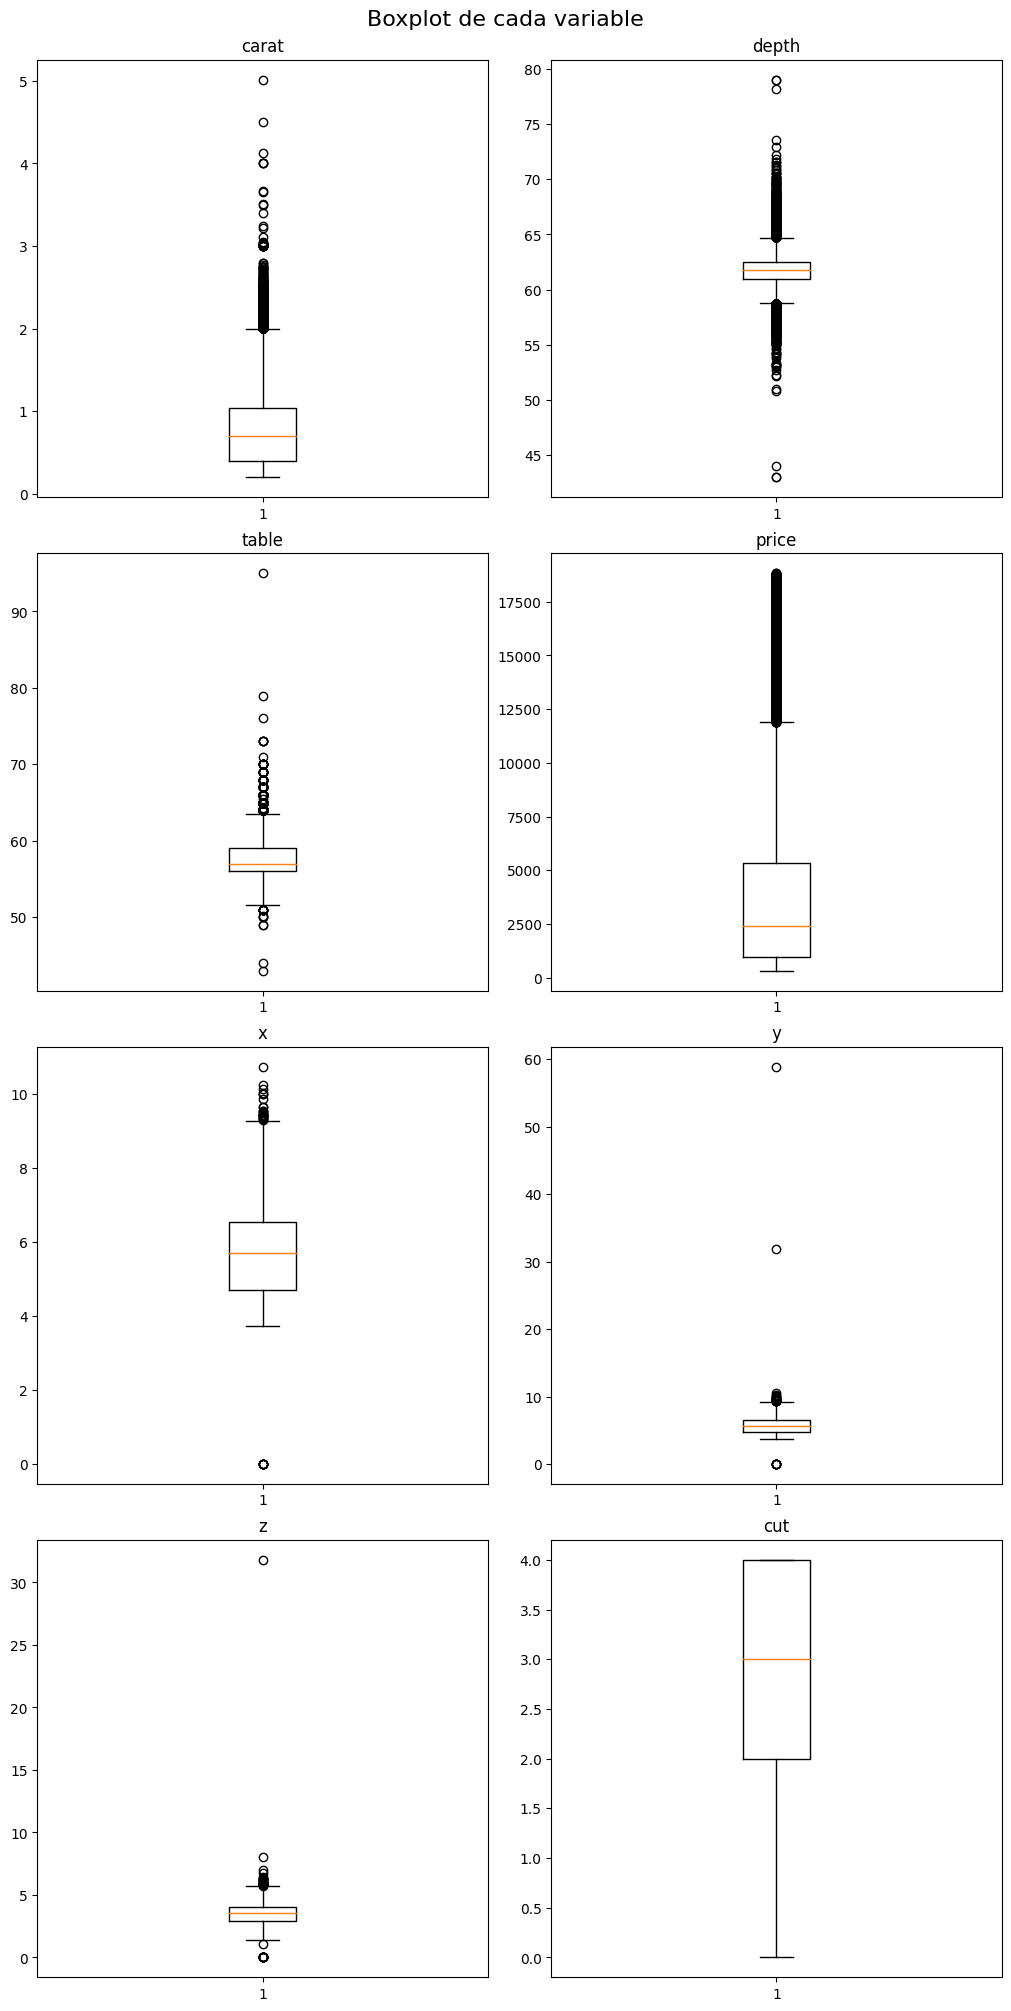

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, constrained_layout=True, figsize=(10, 20))
fig.suptitle('Boxplot de cada variable', fontsize=16)

n_cols = len(dataFrame.columns)  # Obtén el número de columnas en tu DataFrame
d = 0
for i in range(4):
    for j in range(2):
        if d >= n_cols:
            break
        axs[i, j].set_title(dataFrame.columns[d])
        axs[i, j].boxplot(dataFrame.iloc[:, d])  # No es necesario especificar vert=False para gráficos verticales
        d += 1

plt.show()

### 2 (5 puntos)
- Se utilizará el modelo Train/Validation (70%)  y Test (30%). 
- Comente su decisión sobre los parámetros shuffle y random_state
- Separe  los  conjuntos de datos (70-30) (X_trainVal, X_test, y_trainVal, y_test )
- Muestre los primeros 5 registros de cada conjunto.




In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataFrame[['carat','depth','table','x','y','z']], dataFrame['price'], test_size=0.30, random_state=10, shuffle=True) 

print("\nTamaño del train: ", len(X_train))
print("\nTamaño del test: ", len(X_test))




Tamaño del train:  37758

Tamaño del test:  16182


+ Random State

No hubo ningún motivo en particular para escoger el valor de 10 para el random_state. Lo único que se tomó en cuenta para decidir asignar un valor es el hecho de poder mantener la misma semilla durante las distintas ejecuciones. Esto permite que los resultados sean reproducibles, permitiendo una plena depuración y validación de los resultados. Al usar siempre la semilla 10 se garantiza lal consistencia en diferentes ejecuciones del código.


+ Shuffle

Se escogió Shuffler=true debido a que, al no ser una serie temporal donde el orden de los datos tiene importancia, entonces esto permite asegurar que los datos están distribuidos de manera aleatoria, lo que a su vez evita que haya algún sesgo en la distribución de los datos.


### 3  (10 puntos)
- Preprocese los atributos (Solo deje para más adelante escalar los datos).
- Debe comentar en celdas del texto el por qué seleccionó las técnicas utilizadas.

In [7]:
"""Verificando si existen valores null o NaN"""
dataFrame.isna().any()
dataFrame.isnull().any()



carat    False
depth    False
table    False
price    False
x        False
y        False
z        False
cut      False
dtype: bool

Esto nos dice que ningún atributo cuenta con valores null y todos son números.

In [8]:
"""Calculando outliers"""
def outliersByColumn(column_name:str):
    # Calcular los límites de los outliers
    Q1 = dataFrame[column_name].quantile(0.25)
    Q3 = dataFrame[column_name].quantile(0.75)
    iqr = Q3 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q3 + 1.5 * iqr
    # Aplicar Winsorización a la columna 'column_name'
    dataFrame[column_name] = np.where(dataFrame[column_name] < lower_limit, lower_limit, np.where(dataFrame[column_name] > upper_limit, upper_limit, dataFrame[column_name]))
    return dataFrame.boxplot(column=[column_name], by='price')
outliersByColumn('carat')



In [9]:
# """Aplicando balanceo de datos"""




### 4 (5 puntos)
- Realice selección de atributos.
- Debe utilizar al menos una técnica para justificar su decisión (De entre los métodos: Filter, Wrapper, Embedded).
- Comente sus conclusiones.


In [11]:
import pandas as pd
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Tu DataFrame ya se ha cargado desde el archivo Excel

# Definir las columnas de interés
columnas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut']

# Dividir los datos en conjuntos de entrenamiento y prueba
X = dataFrame[columnas]
y = dataFrame['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

best_accuracy = 0.0
best_combination = None
worst_accuracy = 1.0  # Inicializar con el peor valor de precisión (1.0 es perfecto)
worst_combination = None  # Inicializar con la peor combinación

i = 1
# Evaluar combinaciones de 1 a 7 columnas
for num_columns in range(1, 8):
    all_feature_combinations = list(combinations(columnas, num_columns))

    for random_feature_combination in all_feature_combinations:
        X_train_subset = X_train[list(random_feature_combination)]
        X_test_subset = X_test[list(random_feature_combination)]

        # Entrenar un modelo en el subconjunto actual
        clf = DecisionTreeClassifier(random_state=10)
        clf.fit(X_train_subset, y_train)
        y_pred = clf.predict(X_test_subset)

        # Calcular la precisión
        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = list(random_feature_combination)

        if accuracy < worst_accuracy:
            worst_accuracy = accuracy
            worst_combination = list(random_feature_combination)

        print(f"Subconjunto actual #{i}: {random_feature_combination}")
        print(f"Precisión del subconjunto: {accuracy}")
        i += 1

print("Mejor subconjunto de atributos:", best_combination)
print("Mejor precisión:", best_accuracy)
print("Peor subconjunto de atributos:", worst_combination)
print("Peor precisión:", worst_accuracy)


Subconjunto actual #1: ('carat',)
Precisión del subconjunto: 0.022123346928686196
Subconjunto actual #2: ('depth',)
Precisión del subconjunto: 0.002410085279940675
Subconjunto actual #3: ('table',)
Precisión del subconjunto: 0.0021628970461006055
Subconjunto actual #4: ('x',)
Precisión del subconjunto: 0.00939315288592263
Subconjunto actual #5: ('y',)
Precisión del subconjunto: 0.009578544061302681
Subconjunto actual #6: ('z',)
Precisión del subconjunto: 0.006488691138301817
Subconjunto actual #7: ('cut',)
Precisión del subconjunto: 0.002842664689160796
Subconjunto actual #8: ('carat', 'depth')
Precisión del subconjunto: 0.012174020516623408
Subconjunto actual #9: ('carat', 'table')
Precisión del subconjunto: 0.019157088122605363
Subconjunto actual #10: ('carat', 'x')
Precisión del subconjunto: 0.02033123223334569
Subconjunto actual #11: ('carat', 'y')
Precisión del subconjunto: 0.022679520454826352
Subconjunto actual #12: ('carat', 'z')
Precisión del subconjunto: 0.014954888147324187


### 1.5  (5 puntos)
- Escale los datos.
- Comente qué técnica utilizó y por qué.
- Guarde el archivo ya pre-procesado con el nombre: "'diamondsPROCESADO"

**Nota:** No olvide cómo manejará el "bias" (o agregar columna de unos, o si la implementación de los algoritmos que utilizará permiten indicarle que lo agregue).


### 1.6 (15 puntos)
Presente e implemente un diseño experimental que incluya:
- Dos algoritmos diferentes:
    - Uno será la regresión lineal de mínimos cuadrados sin regularización (OLSR).
    - Usted eligirá un método más, que no sea de los vistos en clase. Si tiene dudas de si puede o no usar algún método, puede consultar al profesor. Para el segundo método deberá elegir al menos un hiperparámetro.
    - Como el OLSR no tiene hiperparámetros, use todo el train/validation para entrenar. Para el otro método, debe usar ten-cross-validation para seleccionar al menos un hiperparámetro.
    - Debe registrar las métricas RMSE y R2. Usted decide cuál de estas dos métricas usa para selecionar la mejor configuración (Justifique su selección).
    
**Nota:** Para el algoritmos seleccionados (no el OLSR) explique los parámetros que recibe según la biblioteca utilizada. 
    

**Regresión Lineal de Mínimos Cuadrados sin Regularización (OLSR):**

La regresión lineal de mínimos cuadrados sin regularización es una elección adecuada para uno de los algoritmos. No tiene hiperparámetros, por lo que puedes usar todo el conjunto de datos de entrenamiento para ajustar el modelo.

**Support Vector Regressor (SVR):**

El algoritmo de Regresión de Vectores de Soporte (SVR) es una técnica de aprendizaje automático para problemas de regresión y se basa en Support Vector Machines (SVM) para realizar la regresión. Se debe configurar al menos un hiperparámetro en SVR, que es el valor de regularización C. El hiperparámetro C controla el equilibrio entre el ajuste perfecto a los datos de entrenamiento y la maximización del margen. Se usa ten-cross-validation para seleccionar el valor óptimo de C.

Posteriormente, se registran las métricas de error cuadrático medio (RMSE) y coeficiente de determinación (R^2) para ambos algoritmos. Se usará R^2 para seleccionar el mejor modelo, ya que proporciona información sobre cuánta varianza se explica por el modelo. Un valor más alto de R^2 indica un mejor ajuste.

A continuación, se muestra un esbozo del diseño experimental:

* Algoritmo 1: Regresión Lineal de Mínimos Cuadrados sin Regularización (OLSR)
  * No tiene hiperparámetros.
  * Use todo el conjunto de entrenamiento.
* Algoritmo 2: Support Vector Regressor (SVR)
  * Hiperparámetro: C (parámetro de regularización).
  * Realiza una búsqueda de hiperparámetros utilizando ten-cross-validation para encontrar el mejor valor de C.

Métricas de Evaluación:

* RMSE (Root Mean Squared Error): Mide la raíz cuadrada del error cuadrático medio y evalúa la precisión del modelo en términos de errores.
* R^2 (Coeficiente de Determinación): Proporciona una medida de cuánta varianza se explica por el modelo.


In [14]:
# Definir las características (X) y la variable objetivo (y)
X = dataFrame[['carat', 'depth', 'table', 'x', 'y', 'z', 'cut']]
y = dataFrame['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Entrenar y evaluar el modelo OLSR
olsr_model = LinearRegression()
olsr_model.fit(X_train, y_train)
y_pred_olsr = olsr_model.predict(X_test)

rmse_olsr = np.sqrt(mean_squared_error(y_test, y_pred_olsr))
r2_olsr = r2_score(y_test, y_pred_olsr)

print("Resultados del modelo OLSR:")
print(f"RMSE: {rmse_olsr}")
print(f"R^2: {r2_olsr}")

# Escalar las características para SVR (opcional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar y evaluar el modelo SVR con validación cruzada
svr_model = SVR(C=1.0, kernel='linear')
svr_scores = cross_val_score(svr_model, X_train_scaled, y_train, cv=10, scoring='neg_mean_squared_error')
svr_rmse_scores = np.sqrt(-svr_scores)

best_svr_rmse = svr_rmse_scores.min()
best_svr_rmse_index = svr_rmse_scores.argmin()
best_svr_model = SVR(C=1.0, kernel='linear')  # Modificar con los hiperparámetros óptimos

best_svr_model.fit(X_train_scaled, y_train)
y_pred_svr = best_svr_model.predict(X_test_scaled)

r2_svr = r2_score(y_test, y_pred_svr)

print("Resultados del modelo SVR:")
print(f"Mejor RMSE con validación cruzada: {best_svr_rmse}")
print(f"R^2: {r2_svr}")

# Puedes ajustar los hiperparámetros de SVR y realizar una búsqueda de hiperparámetros si lo deseas.


Resultados del modelo OLSR:
RMSE: 1510.3442538690485
R^2: 0.8607830025686267
Resultados del modelo SVR:
Mejor RMSE con validación cruzada: 1644.942205428605
R^2: 0.8183672549569639


### 1.7 (5 puntos)

- Por medio de una tabla u otro método idóneo que Usted determine, resuma todos los resultados obtenidos (o la mayoría).
- Grafique comparativamente los valores del real versus el predicho (test), de cada uno de los métodos utilizados.  
- Qué conclusiones finales saca sobre los métodos usados como predictores.

___

# Parte 2  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: **cardio.csv**
1. Algunos detalles del conjunto de datos los puede ver en: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.  **Pero debe usar el conjunto de datos que se le dan adjuntos a este Trabajo Práctico, no descargar otro**.
1. El atributo a predecir es: **cardio**.
1. Proponga al menos dos algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. Ustedes propongan una más.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso.
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros (según la biblioteca).
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental. 
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda. 

In [58]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


## 5: Métricas
### 5.1: Accuracy

Se usa ya que se indicó en la especificación.

### 5.2: F1 Score

Se escogió debido a que este es muy útil para detectar enfermedades. Esto ya que se usa en conjuntos de datos donde hay desbalance de clases. En el caso de este dataset, hay muchos más datos de personas sanas que de personas con problemas cardiovasculares. Además, usa una media entre la precisión y el recall, lo que permite identificar cuantos de los casos postiivos reales ha identificado el modelo.

# 6: Algoritmos

## 6.1: Pre-procesaimiento de los datos

In [59]:
dataFrame = pd.read_csv('cardio.csv', header =0, delimiter = ';')
dataFrame.head() #Show first 5 rows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,2,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,3,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,4,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,5,23393,1,155,62.0,120,80,1,1,0,0,1,0


En este caso se eliminará la columna de ID ya que esta no ofrece ningún tipo de información que enriquezca los datos.

In [60]:
#id is not a feature
dataFrame = dataFrame.drop(['id'], axis=1)
#Convert age to years because is given in days
dataFrame['age'] = dataFrame['age']/365

dataFrame.head() #Show first 5 rows

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.558904,1,155,69.0,130,80,2,2,0,0,1,0
1,40.131507,1,163,71.0,110,70,1,1,0,0,1,1
2,60.002740,1,165,70.0,120,80,1,1,0,0,1,0
3,39.860274,2,165,85.0,120,80,1,1,1,1,1,0
4,64.090411,1,155,62.0,120,80,1,1,0,0,1,0


In [61]:
#check null values
dataFrame.isnull().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [62]:
#checking correct value types
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  float64
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  cardio       69301 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.3 MB


In [63]:
#summary of the dataframe
dataFrame.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.339140,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.759621,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.983562,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.427397,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Se procede a realizar un histograma de las variables para ver su distribución

c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


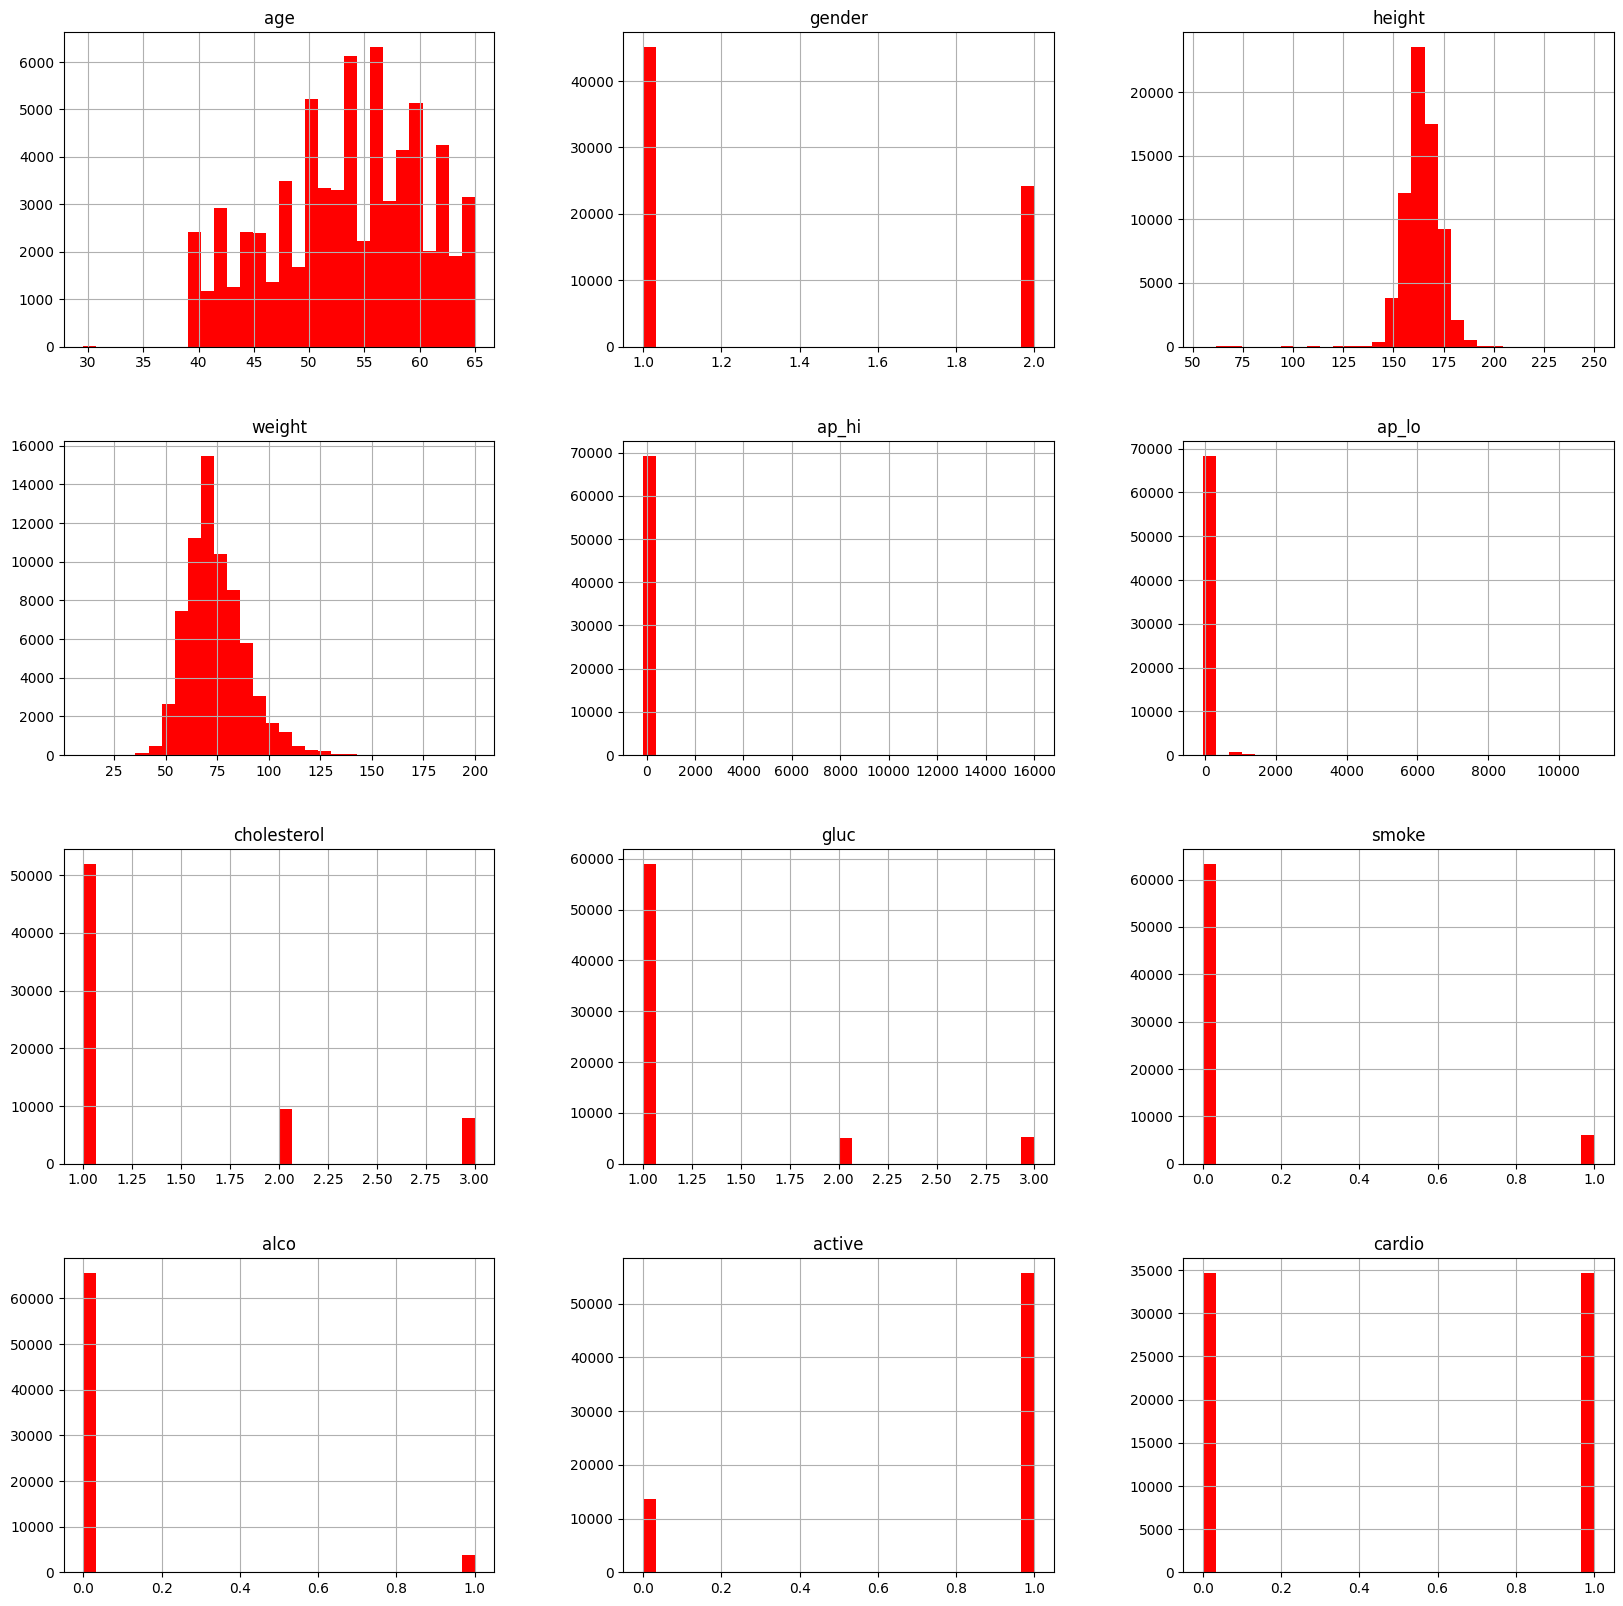

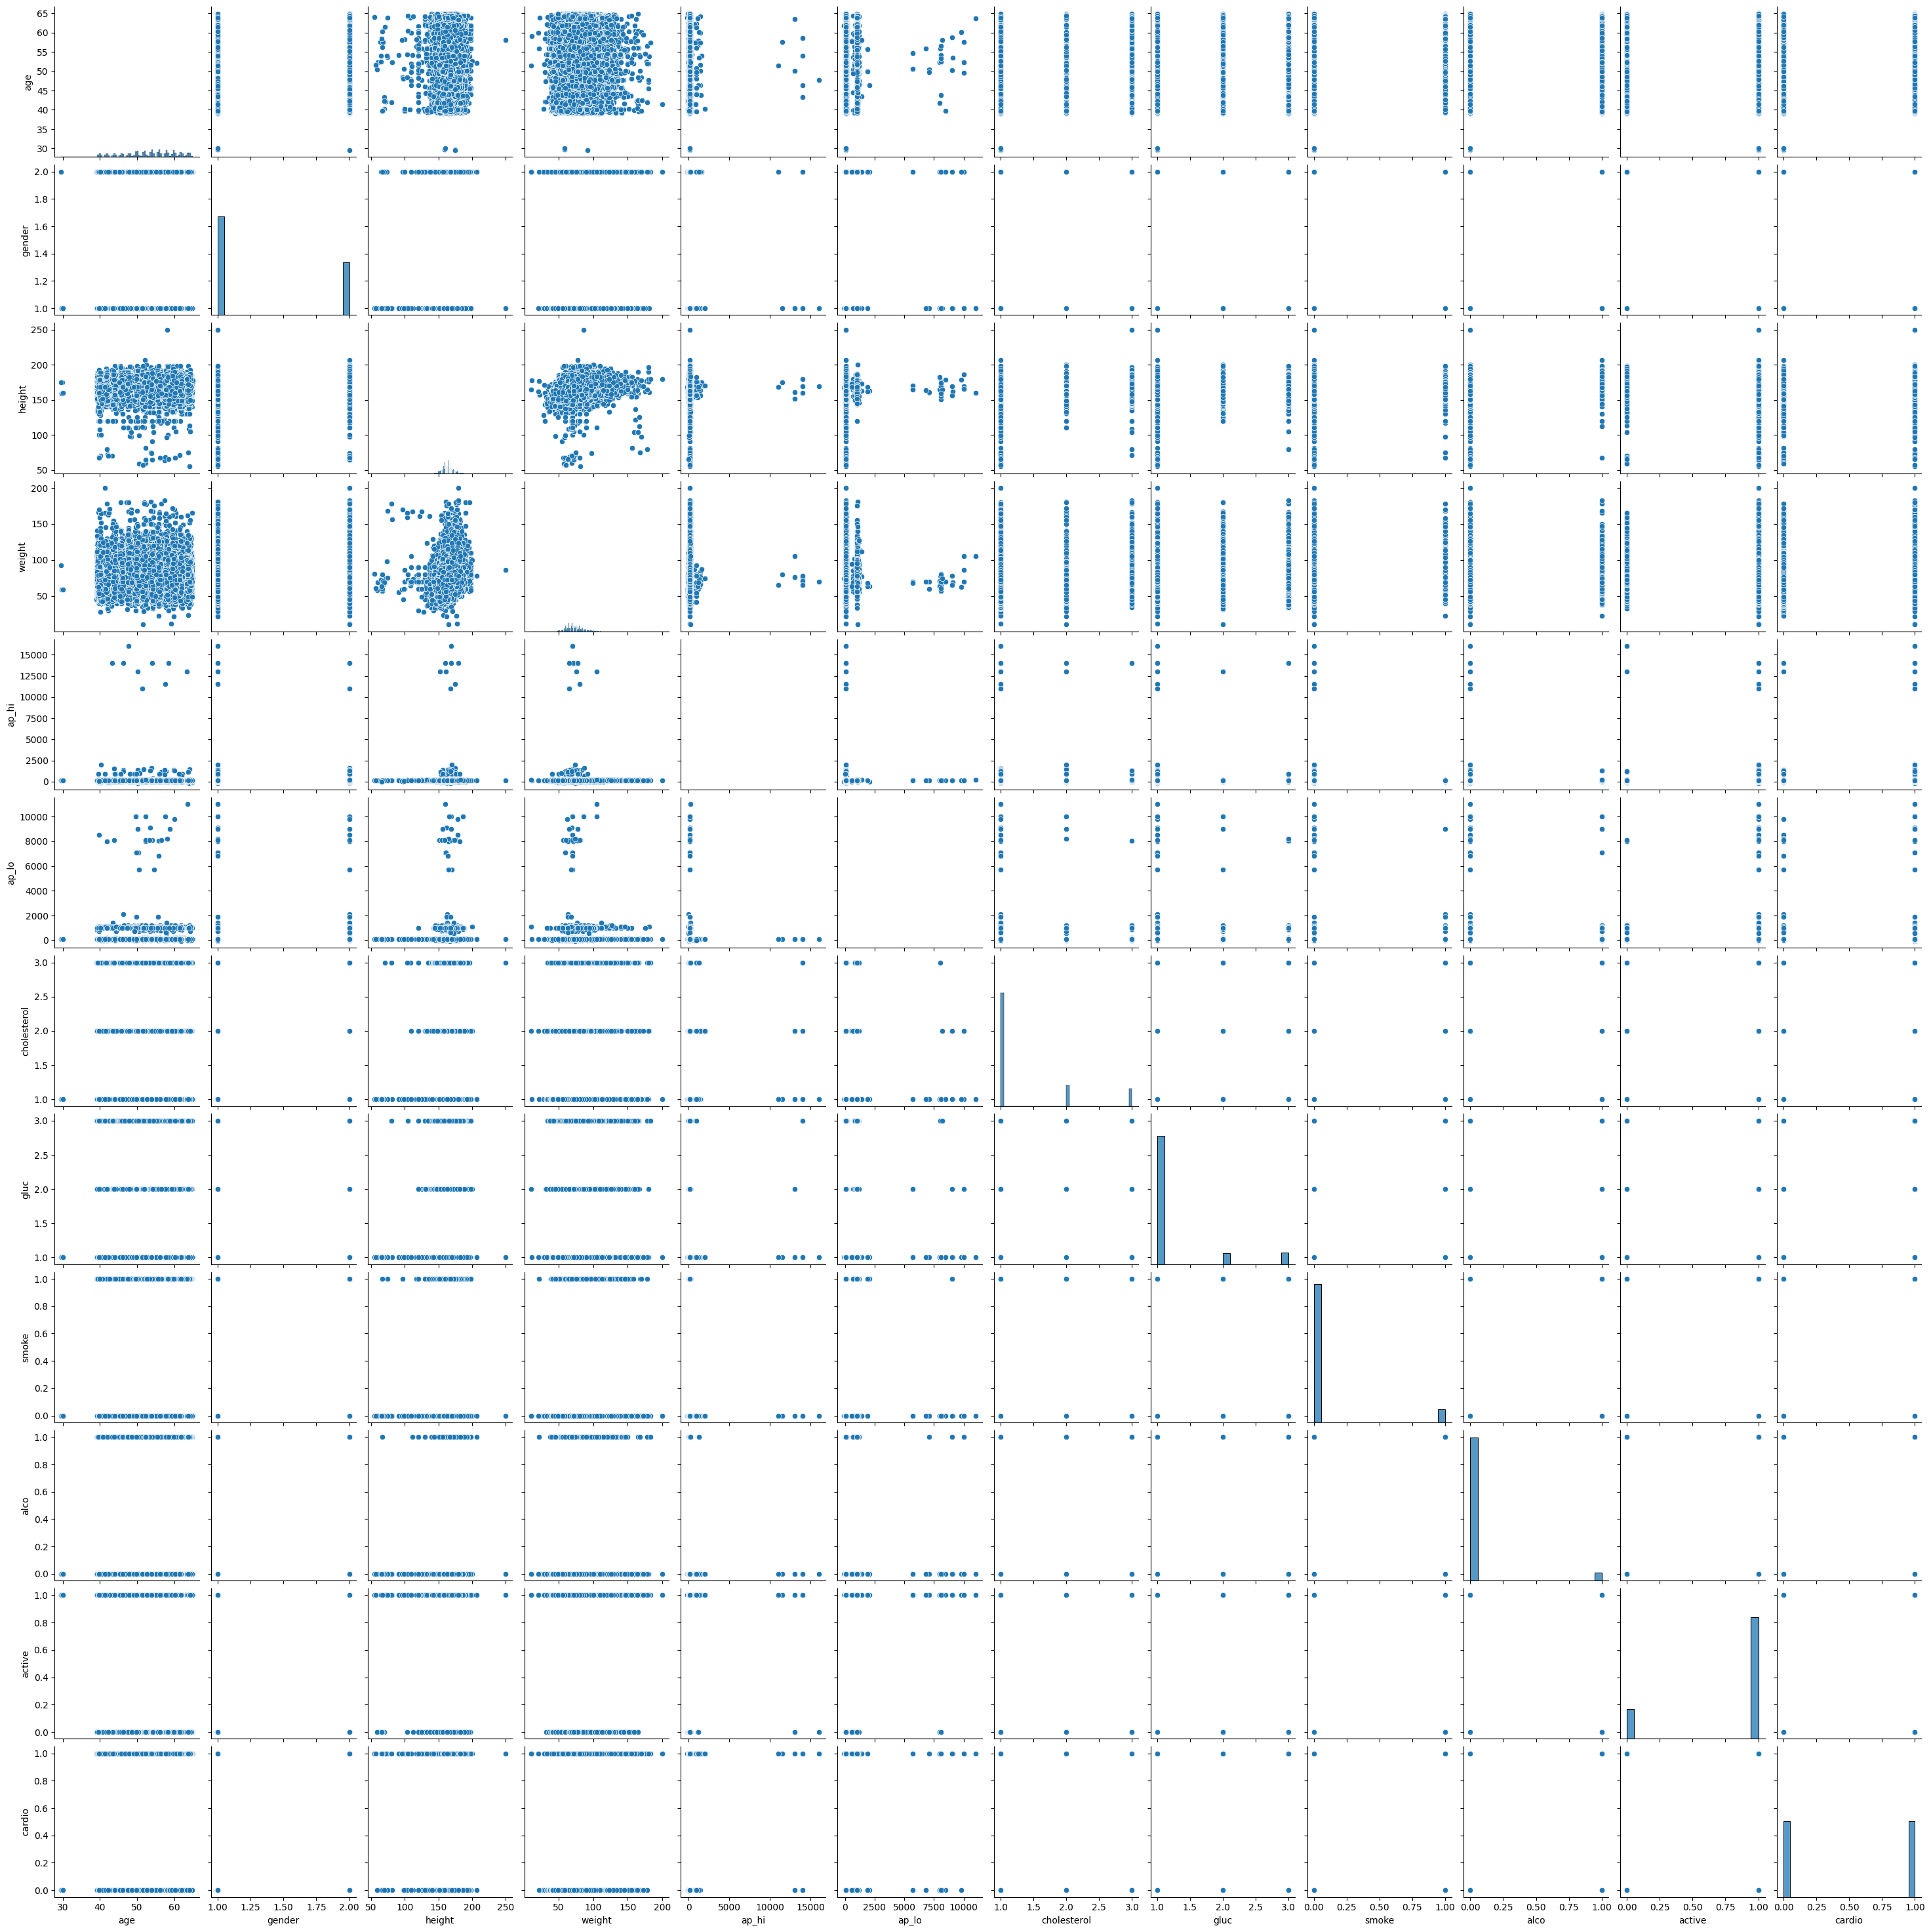

In [98]:

dataFrame.hist(bins = 30, figsize = (20,20), color = 'r')
sns.pairplot(dataFrame)

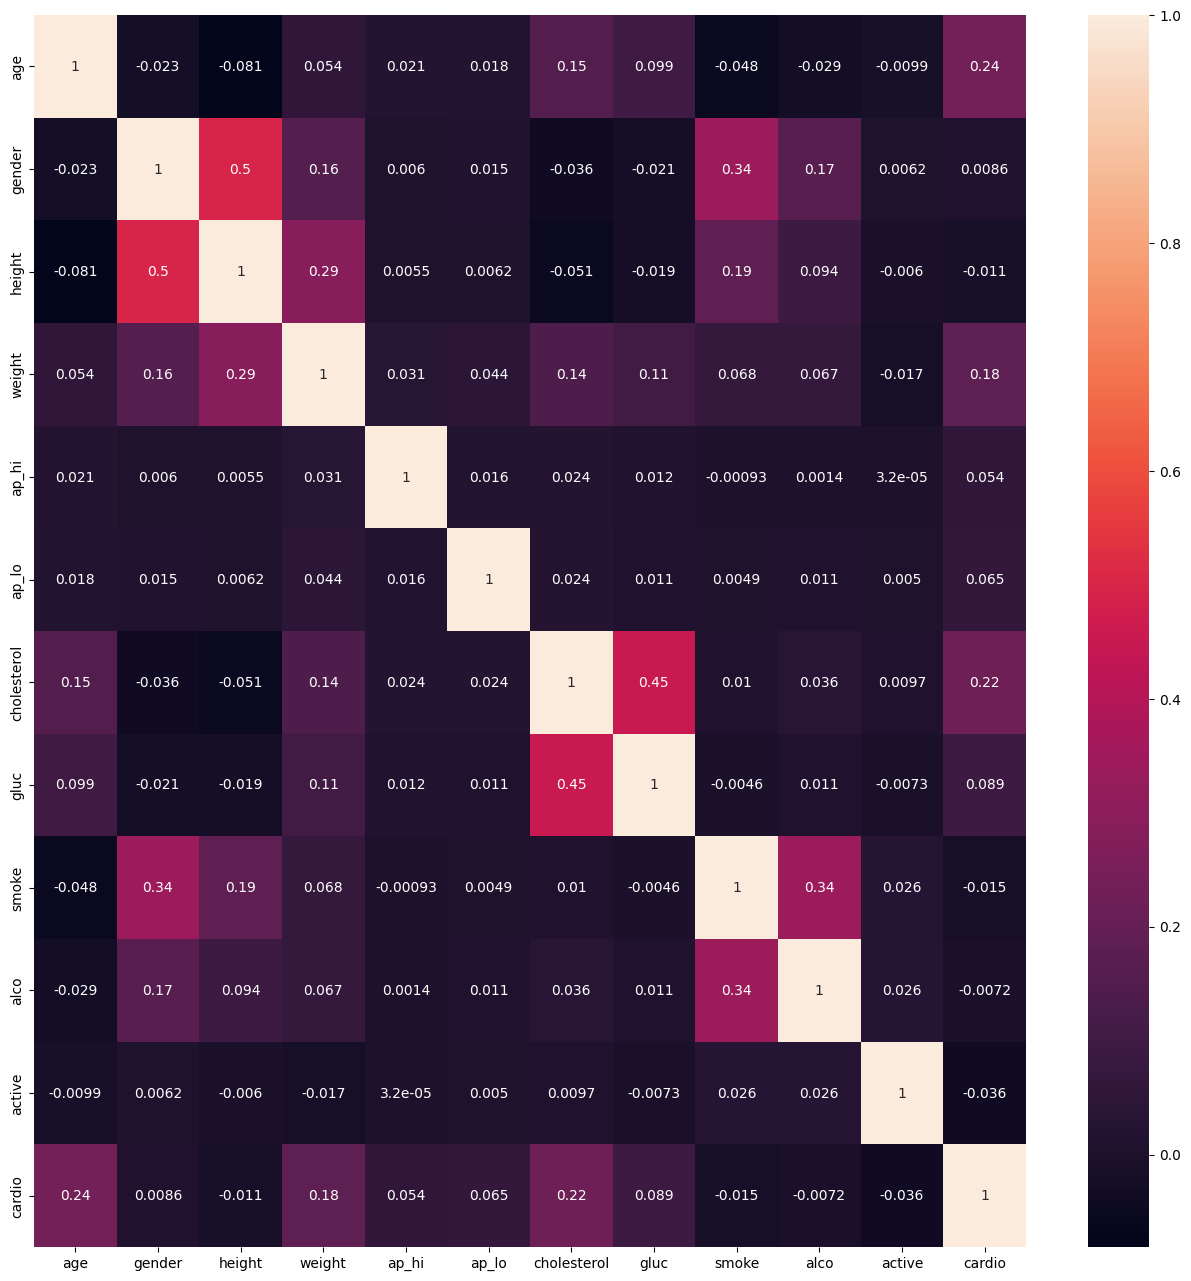

In [32]:
# get the correlation matrix
corr_matrix = dataFrame.corr()
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

La matriz de correlación indica que hay algunas variables que tienen una correlación notoria. Por la alta dimensionalidad de los datos, se usará PCA para poder obtener los componentes principales y así reducir la dimensionalidad de los datos.

In [65]:
dataFrame_target = dataFrame['cardio']
dataFrame_final = dataFrame.drop(columns =['cardio'])

In [ ]:
dataFrame_target = dataFrame['cardio']
dataFrame_final = dataFrame.drop(columns =['cardio'])
X_train, X_test, y_train, y_test = train_test_split(dataFrame_target, dataFrame_final, test_size = 0.3)
numeric_features = dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Determina cuántos componentes principales deseas retener (por ejemplo, el 95% de la varianza)
n_components = len(cumulative_variance[cumulative_variance < 0.95]) + 1
pca = PCA(n_components=n_components)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)


In [66]:
#spliting the data in to test and train sets for PCA


X_train, X_test, y_train, y_test = train_test_split(dataFrame_target, dataFrame_final, test_size = 0.3)

In [67]:

numeric_features = dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]


In [68]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)


In [69]:
pca = PCA()
pca.fit(scaled_data)


PCA()

Se usa un 95% de la varianza ya que esto suele ser un umbral que indica que se está reteniendo la gran mayoría de la inforamción de los datos originales, mientras se reduce significativamente la dimensionalidad.

In [70]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Determina cuántos componentes principales deseas retener (por ejemplo, el 95% de la varianza)
n_components = len(cumulative_variance[cumulative_variance < 0.95]) + 1


In [71]:
pca = PCA(n_components=n_components)
pca.fit(scaled_data)


PCA(n_components=10)

In [72]:
pca_data = pca.transform(scaled_data)
# Supongamos que "pca_data" es tu matriz de datos transformados por PCA
# Los nombres de las columnas para el nuevo DataFrame pueden ser "PC1", "PC2", ..., "PCn" (donde n es el número de componentes principales)
column_names = [f'PC{i+1}' for i in range(pca_data.shape[1])]
pca_df = pd.DataFrame(data=pca_data, columns=column_names)
pca_df.describe()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
count,6.930100e+04,6.930100e+04,6.930100e+04,6.930100e+04,6.930100e+04,6.930100e+04,6.930100e+04,6.930100e+04,6.930100e+04,6.930100e+04
mean,-7.956323e-17,1.804527e-17,1.558455e-17,2.788814e-17,4.839413e-17,-1.312383e-17,-3.096404e-17,1.307257e-17,-6.500398e-17,3.357856e-17
std,1.265663e+00,1.229479e+00,1.057014e+00,1.007483e+00,9.943271e-01,9.911191e-01,9.636762e-01,8.356496e-01,7.872858e-01,7.324732e-01
min,-4.383236e+00,-6.003201e+00,-9.244745e+00,-2.148054e+00,-1.208341e+01,-3.836508e+01,-2.426910e+00,-4.443334e+00,-4.640713e+00,-3.610298e+00
25%,-8.861717e-01,-5.049090e-01,-5.719362e-01,-2.932811e-01,-5.272986e-01,-7.084913e-02,-7.206268e-01,-4.182059e-01,-4.193539e-01,-1.144355e-01
50%,-3.525253e-01,6.434870e-02,3.774369e-02,4.376755e-02,-3.022734e-01,2.296460e-01,-6.924087e-02,-5.260746e-02,-8.580060e-02,6.727997e-02
75%,6.287748e-01,6.467362e-01,6.298568e-01,2.583407e-01,1.435932e-01,3.753047e-01,6.766543e-01,3.961839e-01,3.466210e-01,2.603517e-01
max,8.748261e+00,6.552470e+00,1.497078e+01,6.245737e+01,5.633871e+01,5.352377e+01,1.828584e+01,8.617036e+00,9.860765e+00,3.657924e+00


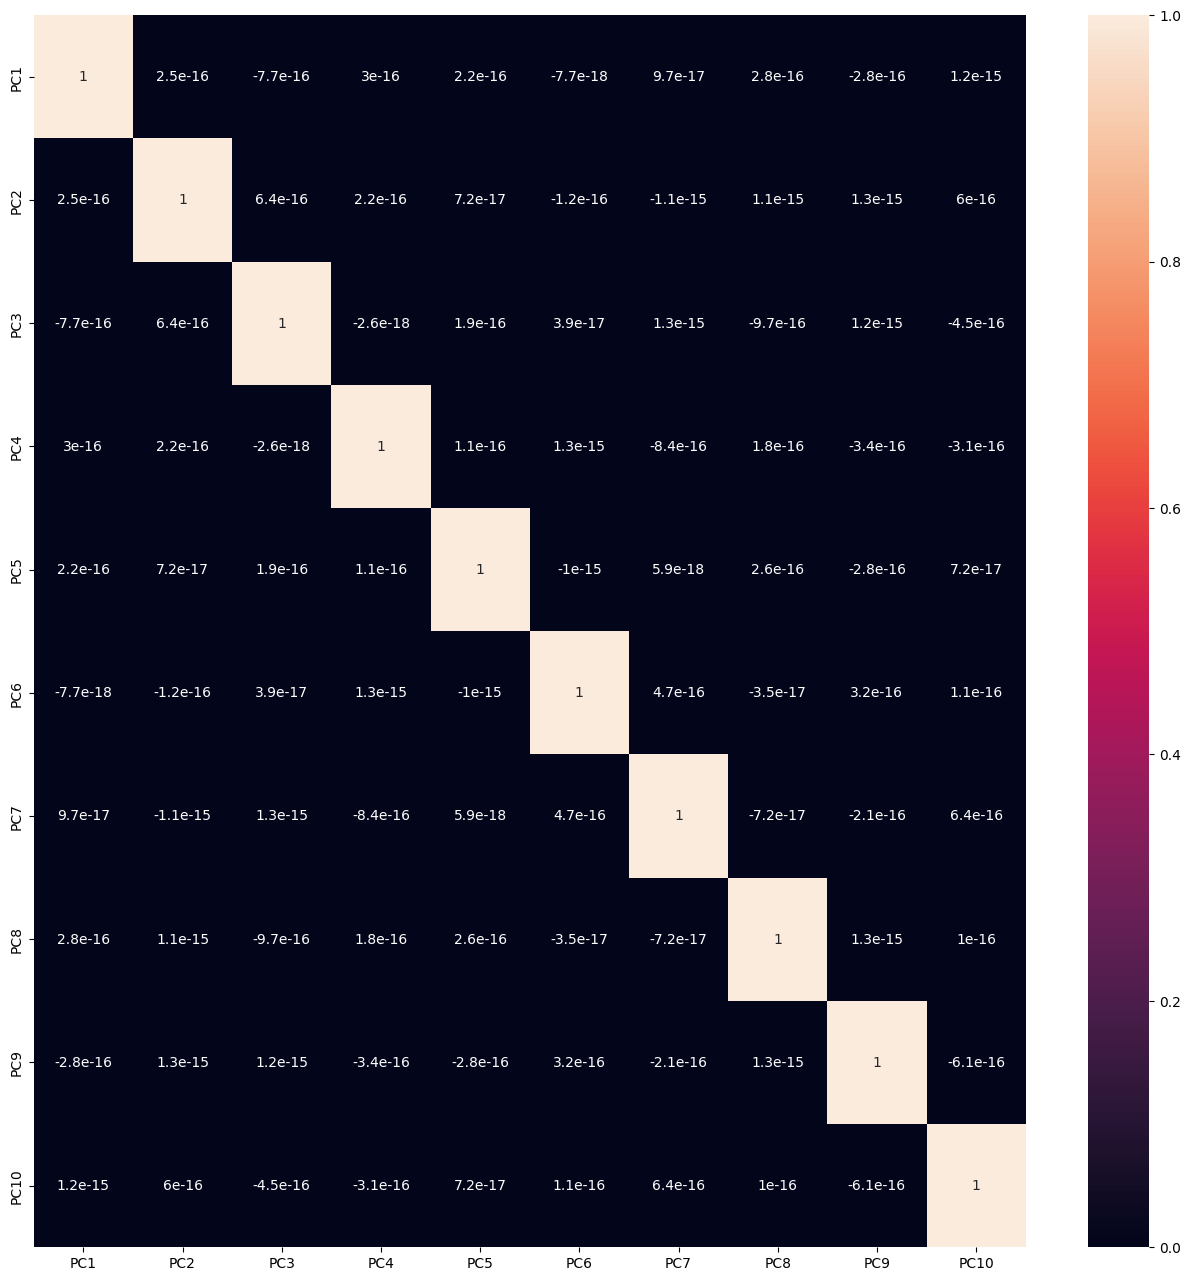

In [73]:
# get the correlation matrix
corr_matrix = pca_df.corr()
# plotting the correlation matrix
plt.figure(figsize = (16,16))
sns.heatmap(corr_matrix, annot = True)
plt.show()

PCA ha reducido la dimensionalidad de los datos originales y ha generado componentes principales que tienen valores centrados en el origen y una menor dispersión en comparación con las variables originales. Las estadísticas proporcionadas para las componentes principales reflejan estas transformaciones.

## 6.2: Explicación de los algoritmos
### 6.2.1: Random Forest
  * Random Forest es un algoritmo de aprendizaje automático que se basa en el conjunto de árboles de decisión. Crea múltiples árboles de decisión durante el proceso de entrenamiento y combina sus predicciones para mejorar la precisión y reducir el sobreajuste. Cada árbol se entrena en una muestra aleatoria de los datos y utiliza características aleatorias, lo que lo hace robusto y capaz de manejar una variedad de problemas de clasificación y regresión.
  * Se usaron varios parámetros:
    * n_estimators: Controla el número de árboles que se usarán en el algoritmo. Mientras más se usan mejor es el rendimiento pero es más costoso computacionalmente el ejecutarlo.
    * max_depth: Define la profundidad máximad de los árboles.
    * min_samples_split: Indica el número mínimo de muestras requeridas para dividir un nodo interno.
    * min_samples_leaf: Establece el número mínimo de muestras requeridas en una hoja.
    * random_state: Garantiza la reproducibilidad de los resultados.
La implementación consistió en realizar varias pruebas dividiendo el conjunto de datos de forma distinta. Esto con el fin de poder ver qué distribución de datos daba un mejor resultado.
### 6.2.1: Logistic Regresion
  * La Regresión Logística es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación. Su objetivo es modelar la probabilidad de que una instancia pertenezca a una clase particular. Utiliza la función logística para transformar una combinación lineal de características en una probabilidad entre 0 y 1. El modelo se entrena con datos etiquetados y ajusta los coeficientes para maximizar la probabilidad de los datos de entrenamiento. Se utiliza ampliamente en clasificación binaria y se puede adaptar para problemas de clasificación multiclase.
  * Se usaron varios parámetros:
    * C: Ajusta la fuerza de regularización
    * penalty: Controla la penalización aplicada a los coeficientes del modelo para evitar sobreajuste.
    * max_iter: Controla el número máximo de iteraciones del algoritmo.
    * solver: Algoritmo usando para optimizar el modelo
    * random_state: Garantiza la reproducibilidad de los resultados.
La implementación consistió en realizar varias pruebas dividiendo el conjunto de datos de forma distinta. Esto con el fin de poder ver qué distribución de datos daba un mejor resultado.


## 6.3 Diseño experimental

El diseño experimental fue basado en los algoritmos Random Forest y Regresión logísticas, descritos anteriormente en el punto 6.2

**1. Random Forest**

Se escogió un rango amplio de valores para los hiperparámetros con el fin de poder encontrar la combinación que de un mejor resultado. En el caso de los n_estimators, se evaluaron de 200 en 200. A su vez, se utilizaron distintas profundidades con el fin de poder evaluar si se requiere o no una profundad definida y de requerirla, qué tanto es necesario. También se desea averiguar la cantidad de muestras óptima para cada nodo, así como la cantidad de muestras para cada hoja. El random_state usado será el mismo que el usado a lo largo de todo el trabajo práctico.

Se aplicará la misma configuración tanto para la métrica de Accucary como la de F1-Score

Se escoge esa cantidad de datos ya que si se agregan más posibles valores a los hyperparámetros, el tiempo de búsqueda de la mejor configuración se dispara.

**2. Logistic Regretion:**

Nuevamente, se escoge un rango amplio de valores para los hiperparámetros con el fin de poder encontrar la mejor combinación. En el caso de C se evalúan varios valores desde 0.01 a 100. Para el penalty se usará regularización L1 y L2. Se definirá un máximo de 1000 iteraciones para poder asegurar que se ejecuten en su totalidad los algoritmos. En solver se colocó liblinear ya que este es compatible con los penalty L1. Finalmente, el random_state usado será el mismo que el usado a lo largo de todo el trabajo práctico.

Se aplicará la misma configuración tanto para la métrica de Accucary como la de F1-Score

Se escoge esa cantidad de datos ya que si se agregan más posibles valores a los hyperparámetros, el tiempo de búsqueda de la mejor configuración se dispara.

## 6.4 Programación del diseño experimental

In [80]:
#loads data
X = pca_df
y = dataFrame_target

In [81]:
# TRAINING WITH 60% OF DATA
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=10)

# TEST WITH 40% OF DATA
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

#imprimir el tamaño del conjunto de datos
print("\nTrain size: ", X_train.shape[0])
print("\nValidation size: ", X_val.shape[0])
print("\nTest size: ", X_test.shape[0])


Train size:  41580

Validation size:  13860

Test size:  13861


In [85]:
#Random Forest hyperparameters tuning
rf_model = RandomForestClassifier(random_state=10)

rf_params = {'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 15],
    'min_samples_leaf': [1, 2, 5]}


In [86]:
rfA_GSCV = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True, scoring = 'accuracy')

# cv = 5 means 5-fold cross validation
# n_jobs = -1 means using all cpu processors
# verbose = True means detailed info of search progress
# scoring = evaluation metric
rfA_GSCV.fit(X_val, y_val)

best_rfA_model = rfA_GSCV.best_estimator_


print("Best parameters for accuracy: ", rfA_GSCV.best_params_)
print("Best score for accuracy: ", rfA_GSCV.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for accuracy:  {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}
Best score for accuracy:  0.7101731601731601


In [87]:
rfF1_GSCV = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True, scoring = 'f1')

# cv = 5 means 5-fold cross validation
# n_jobs = -1 means using all cpu processors
# verbose = True means detailed info of search progress
# scoring = evaluation metric
rfF1_GSCV.fit(X_val, y_val)

best_rfF1_model = rfF1_GSCV.best_estimator_


print("Best parameters for F1-Score: ", rfF1_GSCV.best_params_)
print("Best score for F1-Score: ", rfF1_GSCV.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for F1-Score:  {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300}
Best score for F1-Score:  0.7082010831276813


In [92]:
lr_model = LogisticRegression(random_state=10, max_iter=1000)
lr_params = {'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

#, solver='liblinear', class_weight=None

In [93]:

lrA_GSCV = GridSearchCV(lr_model, lr_params, cv=5, n_jobs=-1, verbose=True, scoring = 'accuracy')

# cv = 5 means 5-fold cross validation
# n_jobs = -1 means using all cpu processors
# verbose = True means detailed info of search progress
# scoring = evaluation metric

lrA_GSCV.fit(X_val, y_val)


best_lrA_model = lrA_GSCV.best_estimator_


print("Best parameters for accuracy: ", rfA_GSCV.best_params_)
print("Best score for accuracy: ", rfA_GSCV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for accuracy:  {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}
Best score for accuracy:  0.7101731601731601


In [94]:
lrF1_GSCV = GridSearchCV(lr_model, lr_params, cv=5, n_jobs=-1, verbose=True, scoring = 'f1')
# cv = 5 means 5-fold cross validation
# n_jobs = -1 means using all cpu processors
# verbose = True means detailed info of search progress
# scoring = evaluation metric

lrF1_GSCV.fit(X_val, y_val)
best_lrF1_model = lrF1_GSCV.best_estimator_

print("Best parameters for accuracy: ", lrF1_GSCV.best_params_)
print("Best score for accuracy: ", lrF1_GSCV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for accuracy:  {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best score for accuracy:  0.715374084982199


In [97]:
# Predictions with Random Forest
rfA_predictions = best_rfA_model.predict(X_test)
rfF1_predictions = best_rfF1_model.predict(X_test)

# Calcula el accuracy y el F1-score para el modelo Random Forest
rf_accuracy = accuracy_score(y_test, rfA_predictions)
rf_f1 = f1_score(y_test, rfF1_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1-score:", rf_f1)

lrA_predictions = best_lrA_model.predict(X_test)
lrF1_predictions = best_lrF1_model.predict(X_test)

# Calcula el accuracy y el F1-score para el modelo Regresión Logística
lr_accuracy = accuracy_score(y_test, lrA_predictions)
lr_f1 = f1_score(y_test, lrF1_predictions)

print("Logistic Regretion Accuracy:", lr_accuracy)
print("Logistic Regretion F1-score:", lr_f1)

Random Forest Accuracy: 0.7101219248250487
Random Forest F1-score: 0.7073312083454072
Logistic Regretion Accuracy: 0.7212322343265277
Logistic Regretion F1-score: 0.7060702875399361


## 6.5 Resultados y conclusiones